In [1]:
import pandas as pd
df = pd.read_csv('position_salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [2]:
m=len(df)
m

10

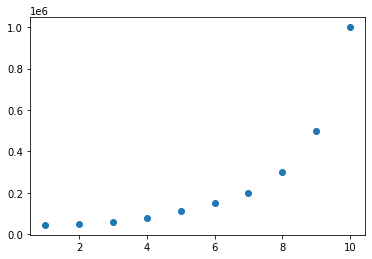

In [3]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df['Level'], df['Salary'])

In [4]:
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df.head()

,00,Position,Level,Salary
0,1,Business Analyst,1,45000
1,1,Junior Consultant,2,50000
2,1,Senior Consultant,3,60000
3,1,Manager,4,80000
4,1,Country Manager,5,110000


In [5]:
df = df.drop(columns='Position')

In [6]:
y = df['Salary']
y[:5]

0     45000
1     50000
2     60000
3     80000
4    110000
Name: Salary, dtype: int64

In [7]:
X = df.drop(columns = 'Salary')

In [8]:
X.head()

,00,Level
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


In [9]:
X['Level1'] = X['Level']**2

In [10]:
X['Level2'] = X['Level']**3

In [11]:
X['Level3'] = X['Level']**4

In [12]:
X['Level4'] = X['Level']**5

In [13]:
X['Level5'] = X['Level']**6

In [14]:
X['Level6'] = X['Level']**7

In [15]:
X.head()

,00,Level,Level1,Level2,Level3,Level4,Level5,Level6
0,1,1,1,1,1,1,1,1
1,1,2,4,8,16,32,64,128
2,1,3,9,27,81,243,729,2187
3,1,4,16,64,256,1024,4096,16384
4,1,5,25,125,625,3125,15625,78125


In [16]:
X = X/X.max()

In [17]:
import numpy as np
theta = np.array([0]*len(X.columns))
theta

array([0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
def hypothesis(X, theta):
    y1 = theta*X
    return np.sum(y1, axis=1)

In [19]:
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return sum(np.sqrt((y1-y)**2))/(2*m) 

In [20]:
def gradientDescent(X, y, theta, alpha, epoch):
    J=[]
    k=0
    while k < epoch:
        y1 = hypothesis(X, theta)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*sum((y1-y)* X.iloc[:, c])/m
        j = cost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [21]:
theta = np.array([0.0]*len(X.columns))
J, j, theta = gradientDescent(X, y, theta, 0.0001, 100000)

In [22]:
theta

array([  9843.64371797,  64170.77197992,  98586.99876897, 121560.09141851,
       137753.48154679, 149633.11062315, 158603.30178506, 165526.23895563])

In [23]:
y_hat = theta*X
y_hat = np.sum(y_hat, axis=1)

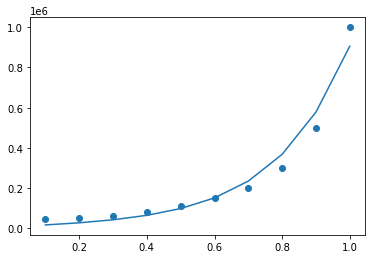

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X['Level'], y)          
plt.plot(X['Level'], y_hat)
plt.show()

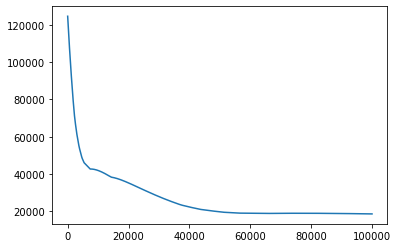

In [26]:
plt.plot(np.arange(100000),J)